# Citi Bike Ridership
By Wilson Alexei, Carlos Mesquita, and Lize-Alet Morkel

In [ ]:
### Keep for running in Google Colab
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Classroom/DATA 6505: Python for Business Analytics- FA 2022 01 & OL/Final Project/dataset"
filepath = "/content/drive/MyDrive/Classroom/DATA 6505: Python for Business Analytics- FA 2022 01 & OL/Final Project/dataset/JC-202202-citibike-tripdata.csv"

## Introduction

## Data Source
The source of our dataset is from the official Citi Bike website https://ride.CitiBikenyc.com/system-data. The dataset provides us insights into the usage of Citi Bike in the Jersey City area for the period of 12 months from December 2021 to November 2022.

### Data Dictionary

| Feature Name | Definition | Key | Data Type |
|--------------|------------|-----| --------- |
| ride_id | _Unique ID for ride identification_ | ... | object |
| rideable_type | _Type of bike_ | __classic_bike = Tradational Bike, electric_bike = E-Bike, docked_bike =unknown__ | object |
| started_at | _Day and time ride started_ | ... | object |
| ended_at | _Day and time ride ended_ | ... | object |
| start_station_name | _Name of the starting station_ | ... | object |
| start_station_id | _Unique ID of the starting station_ | ... | object |
| end_station_name | _Name of the ending station_ | ... | object |
| end_station_id | _Unique ID of the ending station_ | ... | object |
| start_lat | _Latitude of the starting station_ | ... | float64 |
| start_lng | _Longitude of the starting station_ | ... | float64 |
| end_lat | _Latitude of the ending station_ | ... | float64 |
| end_lng | _Longitude of the ending station_ | ... | float64 |
| member_casual | _Membership type of the rider_ | __member = Membership, casual = No membership__ | object |

### Read Data from Files

In [2]:
### Imports
from pathlib import Path
import pandas as pd
import numpy as np
import os
import folium

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.constrained_layout.use'] = True

import seaborn as sns
plt.style.use('seaborn-whitegrid')

C:\Users\carlos\AppData\Local\Temp\ipykernel_14388\316301862.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Initial Data Review

In [4]:
### Test one file
# filepath = "dataset/JC-202202-citibike-tripdata.csv"
df_test = pd.read_csv(filepath)
print("Done", os.path.basename(filepath))
print(df_test.info())
df_test.head()

Done JC-202202-citibike-tripdata.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31911 entries, 0 to 31910
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             31911 non-null  object 
 1   rideable_type       31911 non-null  object 
 2   started_at          31911 non-null  object 
 3   ended_at            31911 non-null  object 
 4   start_station_name  31911 non-null  object 
 5   start_station_id    31911 non-null  object 
 6   end_station_name    31795 non-null  object 
 7   end_station_id      31795 non-null  object 
 8   start_lat           31911 non-null  float64
 9   start_lng           31911 non-null  float64
 10  end_lat             31836 non-null  float64
 11  end_lng             31836 non-null  float64
 12  member_casual       31911 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.2+ MB
None


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B7BCBC133222B04A,classic_bike,2022-02-17 11:48:16,2022-02-17 11:58:30,Astor Place,JC077,Journal Square,JC103,40.719282,-74.071262,40.733670,-74.062500,member
1,0F9F1A0F18FD3A22,electric_bike,2022-02-02 08:31:26,2022-02-02 08:38:08,Astor Place,JC077,Sip Ave,JC056,40.719282,-74.071262,40.730897,-74.063913,member
2,44B5D106DDB509AC,electric_bike,2022-02-09 14:05:49,2022-02-09 14:10:21,Astor Place,JC077,Sip Ave,JC056,40.719282,-74.071262,40.730897,-74.063913,member
3,E1434F258C195DC6,classic_bike,2022-02-08 07:57:44,2022-02-08 08:15:26,Astor Place,JC077,Sip Ave,JC056,40.719282,-74.071262,40.730897,-74.063913,member
4,64821879B2659E35,classic_bike,2022-02-07 08:05:28,2022-02-07 08:24:03,Astor Place,JC077,Sip Ave,JC056,40.719282,-74.071262,40.730897,-74.063913,member


In [5]:
### Combine all files

### Get all files in directory with .csv extension
# path = "dataset"
files = Path(path).glob('*.csv')

### Create empty list to store dataframes
dfs = []
### Iterate through files and read each csv as and convert to a data frame
for f in files:
    with open(f): ### open file
        try :
            dfs.append(pd.read_csv(f)) ### Read file, convert to data frame, and add to list
        except Exception as e:
            raise e
        print(os.path.basename(f), "Done") ### Indicate that the file was successfully processed

### Validate Output
try : 
    assert len(dfs) == 12, "More than 12 files were read."
except Exception as e:
        raise e

df_original = pd.concat(dfs)

print("{} files were combined.".format(len(dfs)))

JC-202112-citibike-tripdata.csv Done
JC-202201-citibike-tripdata.csv Done
JC-202202-citibike-tripdata.csv Done
JC-202203-citibike-tripdata.csv Done
JC-202204-citibike-tripdata.csv Done
JC-202205-citibike-tripdata.csv Done
JC-202206-citibike-tripdata.csv Done
JC-202207-citbike-tripdata.csv Done
JC-202208-citibike-tripdata.csv Done
JC-202209-citibike-tripdata.csv Done
JC-202210-citibike-tripdata.csv Done
JC-202211-citibike-tripdata.csv Done
12 files were combined.


In [6]:
### Explore data
df_original.info()
df_original.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894921 entries, 0 to 72708
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             894921 non-null  object 
 1   rideable_type       894921 non-null  object 
 2   started_at          894921 non-null  object 
 3   ended_at            894921 non-null  object 
 4   start_station_name  894911 non-null  object 
 5   start_station_id    894911 non-null  object 
 6   end_station_name    891566 non-null  object 
 7   end_station_id      891566 non-null  object 
 8   start_lat           894921 non-null  float64
 9   start_lng           894921 non-null  float64
 10  end_lat             892888 non-null  float64
 11  end_lng             892888 non-null  float64
 12  member_casual       894921 non-null  object 
dtypes: float64(4), object(9)
memory usage: 95.6+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,87F1811D08BA7BF3,classic_bike,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,JC009,Grove St PATH,JC005,40.727596,-74.044247,40.719586,-74.043117,member
1,48390A4B390ABD36,electric_bike,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,JC009,Hilltop,JC019,40.727596,-74.044247,40.731169,-74.057574,casual
2,93AE14B47CBB30F8,classic_bike,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,JC023,Brunswick St,JC023,40.724176,-74.050656,40.724176,-74.050656,casual
3,5D0BDBFB30D7C9F6,electric_bike,2021-12-11 03:25:41,2021-12-11 03:31:16,Brunswick St,JC023,Baldwin at Montgomery,JC020,40.724176,-74.050656,40.723659,-74.064194,member
4,D6382ADAF1672DD8,classic_bike,2021-12-17 10:59:28,2021-12-17 11:12:41,Brunswick St,JC023,Paulus Hook,JC002,40.724176,-74.050656,40.714145,-74.033552,casual


## Data Cleanup

### Filter
Create a new data frame with only the features that we will be using in our analysis.

In [7]:
### Create new data frame with only the columns of interest
df = df_original[["ride_id", "started_at", "ended_at", "start_station_name", "end_station_name", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual"]]
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual
3,5D0BDBFB30D7C9F6,2021-12-11 03:25:41,2021-12-11 03:31:16,Brunswick St,Baldwin at Montgomery,40.724176,-74.050656,40.723659,-74.064194,member
4,D6382ADAF1672DD8,2021-12-17 10:59:28,2021-12-17 11:12:41,Brunswick St,Paulus Hook,40.724176,-74.050656,40.714145,-74.033552,casual


### Convert Data Types
Some of the data types need to be converted so we can better utilize them.

In [8]:
### Convert times to datetime type
df = df.astype({'started_at':'datetime64', 'ended_at':'datetime64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894921 entries, 0 to 72708
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             894921 non-null  object        
 1   started_at          894921 non-null  datetime64[ns]
 2   ended_at            894921 non-null  datetime64[ns]
 3   start_station_name  894911 non-null  object        
 4   end_station_name    891566 non-null  object        
 5   start_lat           894921 non-null  float64       
 6   start_lng           894921 non-null  float64       
 7   end_lat             892888 non-null  float64       
 8   end_lng             892888 non-null  float64       
 9   member_casual       894921 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 75.1+ MB


### Missing Data

In [9]:
### Calculate percentage of missing rows per column
num_missing_rows = df.isna().any(axis=1).sum()
print(num_missing_rows, "rows contain missing values\n")
print("Percentage of Missing Values Per Column")
print(df.isna().mean().round(4)* 100)

3355 rows contain missing values

Percentage of Missing Values Per Column
ride_id               0.00
started_at            0.00
ended_at              0.00
start_station_name    0.00
end_station_name      0.37
start_lat             0.00
start_lng             0.00
end_lat               0.23
end_lng               0.23
member_casual         0.00
dtype: float64


Because the percentage of missing rows for the two columns with missing values is less than 50% we will drop the missing values

In [10]:
### Drop missing rows in data frame
df.dropna(inplace=True)

### Check that the rows were dropped
print("Percentage of Missing Values Per Column")
df.isna().mean().round(4)* 100

Percentage of Missing Values Per Column


ride_id               0.0
started_at            0.0
ended_at              0.0
start_station_name    0.0
end_station_name      0.0
start_lat             0.0
start_lng             0.0
end_lat               0.0
end_lng               0.0
member_casual         0.0
dtype: float64

### New Features

#### Ride Duration
In order to determine how long a ride was, we will need to create a new feature for ride duration

In [11]:
### Calculate ride duration using start and ending time
df['ride_duration_mins'] = (df['ended_at'] - df['started_at']).astype('timedelta64[m]')
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member,6.0
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual,8.0
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual,7.0
3,5D0BDBFB30D7C9F6,2021-12-11 03:25:41,2021-12-11 03:31:16,Brunswick St,Baldwin at Montgomery,40.724176,-74.050656,40.723659,-74.064194,member,5.0
4,D6382ADAF1672DD8,2021-12-17 10:59:28,2021-12-17 11:12:41,Brunswick St,Paulus Hook,40.724176,-74.050656,40.714145,-74.033552,casual,13.0


Some ride durations are negative which could be due to an issue with the way the data was recorded. Citi Bike notes that the dataset should not include these entries as they are errors so we will remove them.

In [12]:
### Store old number of rows to see how many rides were dropped
old_shape = df.shape[0]

### Remove any rides which have negative or zero ride time
df.drop(df.loc[df['ride_duration_mins'] <= 0].index, inplace=True)

### Number of inaccurate rides dropped
print(old_shape - df.shape[0], "rows dropped")
print(df.shape[0], "rows remain")

152853 rows dropped
738713 rows remain


Now lets look at the dat to see how ride durations are distributed.

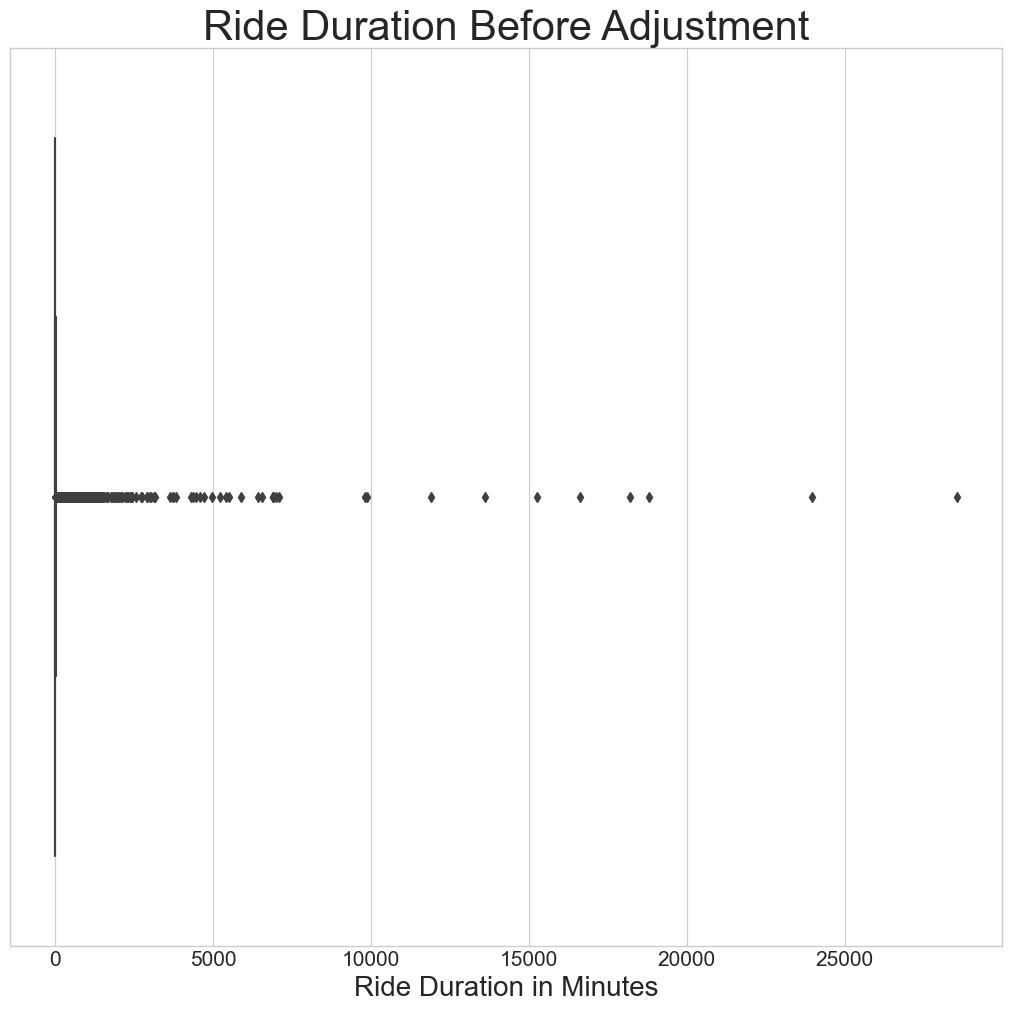

In [13]:
### Before Adjustment

fig, axs = plt.subplots(figsize = (10,10))

### Ride count by day of week over year
sns.boxplot(data=df, x='ride_duration_mins', ax=axs)
axs.set_title("Ride Duration Before Adjustment", fontsize=30)
axs.set_xlabel('Ride Duration in Minutes', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)

plt.show()

There are a number of rides that took longer than 24 hours. This may be due to a bike not being docked back in the station properly which could mean it was abandoned or stolen. Let's correct for these outliers and reanalyze the distribution.

In [14]:
### Adjust for Outliers

q1 =  np.quantile(df['ride_duration_mins'], 0.25)
q3 =  np.quantile(df['ride_duration_mins'], 0.75)
iqr = q3-q1

bound_low = q1 - 1.5 * iqr
bound_up = q3 + 1.5 * iqr

df['ride_duration_mins'] = np.where(df['ride_duration_mins'] > bound_up, bound_up, df['ride_duration_mins'])
df['ride_duration_mins'] = np.where(df['ride_duration_mins'] < bound_low, bound_low, df['ride_duration_mins'])

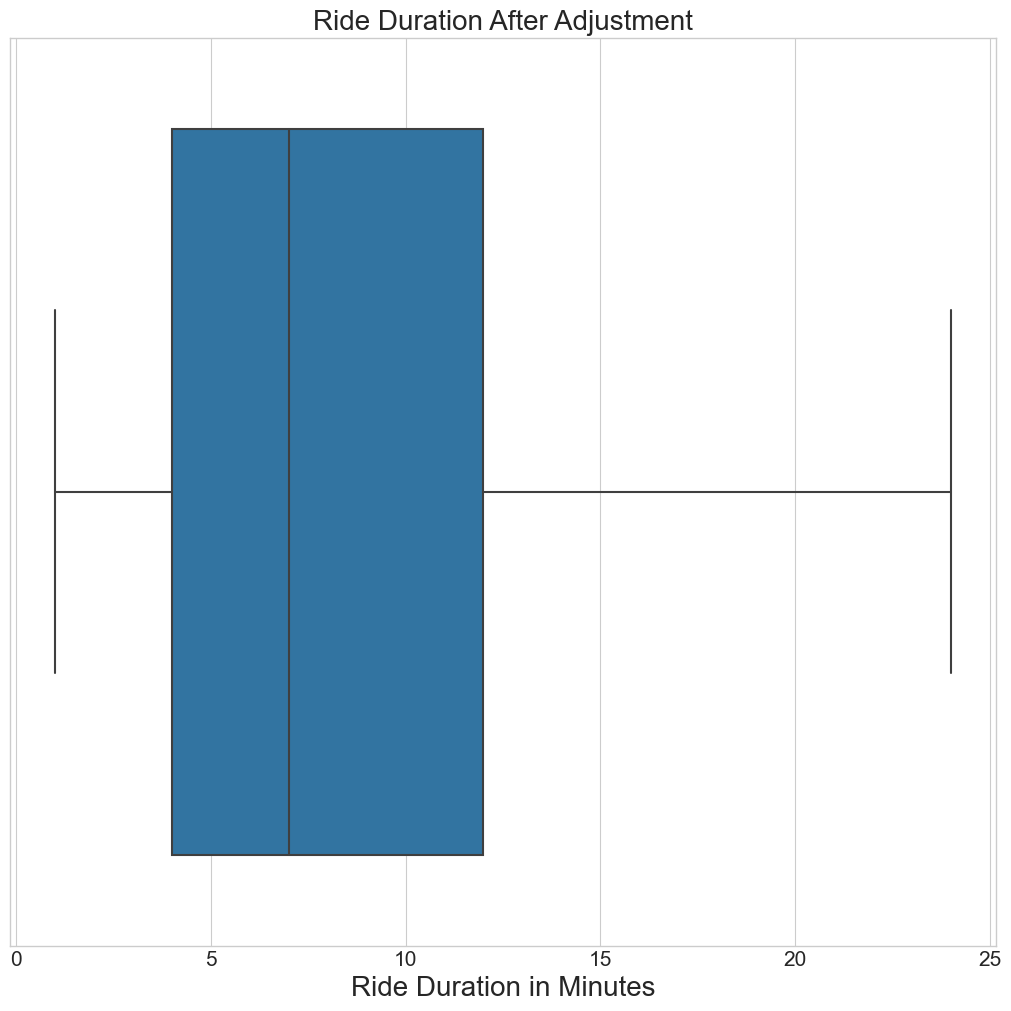

In [15]:
### After Adjustment
fig, axs = plt.subplots(figsize = (10,10))

### Ride count by day of week over year
sns.boxplot(data=df, x='ride_duration_mins', ax=axs)
axs.set_title("Ride Duration After Adjustment", fontsize=20)
axs.set_xlabel('Ride Duration in Minutes', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)

plt.show()

This distribution seems more appropriate for our analysis so we can continue.

#### Date Features

In order to analyze the usage of Citi Bike, we will need to create some new features from the date so they can be utilized in future analysis.

Fist, we will separate the week number, day of the week, and starting hour from the starting time

In [16]:
### Determine week number
df['week_num'] = df["started_at"].dt.isocalendar().week
### Determine day of week
df['day_of_week'] = df["started_at"].dt.strftime('%a')
### Extract start time hour
df['start_hour'] = df["started_at"].dt.strftime('%H')
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins,week_num,day_of_week,start_hour
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member,6.0,49,Sun,09
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual,8.0,49,Tue,20
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual,7.0,52,Fri,16
5,FB33E9088D3EFB56,2021-12-03 15:55:17,2021-12-03 16:00:43,Marshall St & 2 St,Hoboken Terminal - Hudson St & Hudson Pl,40.740802,-74.042521,40.735938,-74.030305,casual,5.0,48,Fri,15
6,93C0CF266A05FB3A,2021-12-10 21:12:58,2021-12-10 21:18:45,Newark Ave,Brunswick & 6th,40.721525,-74.046305,40.726012,-74.050389,casual,5.0,49,Fri,21


Then, we will determine whether the day was a weekday (_Monday, Tuesday, Wednesday, Thursday, Friday_) or a weekend (_Saturday, Sunday_)

In [17]:
### Determine if ride occurred on weekday or weekend
df['weekday_weekend'] = np.where(df["started_at"].dt.dayofweek < 5, "weekday", "weekend")
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins,week_num,day_of_week,start_hour,weekday_weekend
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member,6.0,49,Sun,09,weekend
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual,8.0,49,Tue,20,weekday
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual,7.0,52,Fri,16,weekday
5,FB33E9088D3EFB56,2021-12-03 15:55:17,2021-12-03 16:00:43,Marshall St & 2 St,Hoboken Terminal - Hudson St & Hudson Pl,40.740802,-74.042521,40.735938,-74.030305,casual,5.0,48,Fri,15,weekday
6,93C0CF266A05FB3A,2021-12-10 21:12:58,2021-12-10 21:18:45,Newark Ave,Brunswick & 6th,40.721525,-74.046305,40.726012,-74.050389,casual,5.0,49,Fri,21,weekday


Finally, we will determine which season each ride occurred in. Meteorologist typically break up the year into periods of 3 months when analyzing the seasons. Each season will be defined based on this breakdown:

| Season | Months |
| ------ | ------ |
| Spring | _March, April, May_ |
| Summer | _June, July, August_ |
| Fall   | _September, October, November_ |
| Winter | _December, January, February_ |

In [18]:
### Assign season to each ride.
def set_season(date):
    '''
    Determine the season each date occurred in
    ---
    INPUT:
    + date (datetime): Date of event.
    ---
    OUTPUT:
    + (str): String value representing season.
    '''
    date = int(date)
    if date in [3,4,5]:
        return "spring"
    elif date in [6,7,8]:
        return "summer"
    elif date in [9,10,11]:
        return "fall"
    elif date in [12,1,2]:
        return "winter"
    else:
        return np.NaN

df['season'] = df["started_at"].dt.strftime('%m').apply(set_season)
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins,week_num,day_of_week,start_hour,weekday_weekend,season
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member,6.0,49,Sun,09,weekend,winter
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual,8.0,49,Tue,20,weekday,winter
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual,7.0,52,Fri,16,weekday,winter
5,FB33E9088D3EFB56,2021-12-03 15:55:17,2021-12-03 16:00:43,Marshall St & 2 St,Hoboken Terminal - Hudson St & Hudson Pl,40.740802,-74.042521,40.735938,-74.030305,casual,5.0,48,Fri,15,weekday,winter
6,93C0CF266A05FB3A,2021-12-10 21:12:58,2021-12-10 21:18:45,Newark Ave,Brunswick & 6th,40.721525,-74.046305,40.726012,-74.050389,casual,5.0,49,Fri,21,weekday,winter


## Main Analysis

### Where Do People Use Citi Bike?

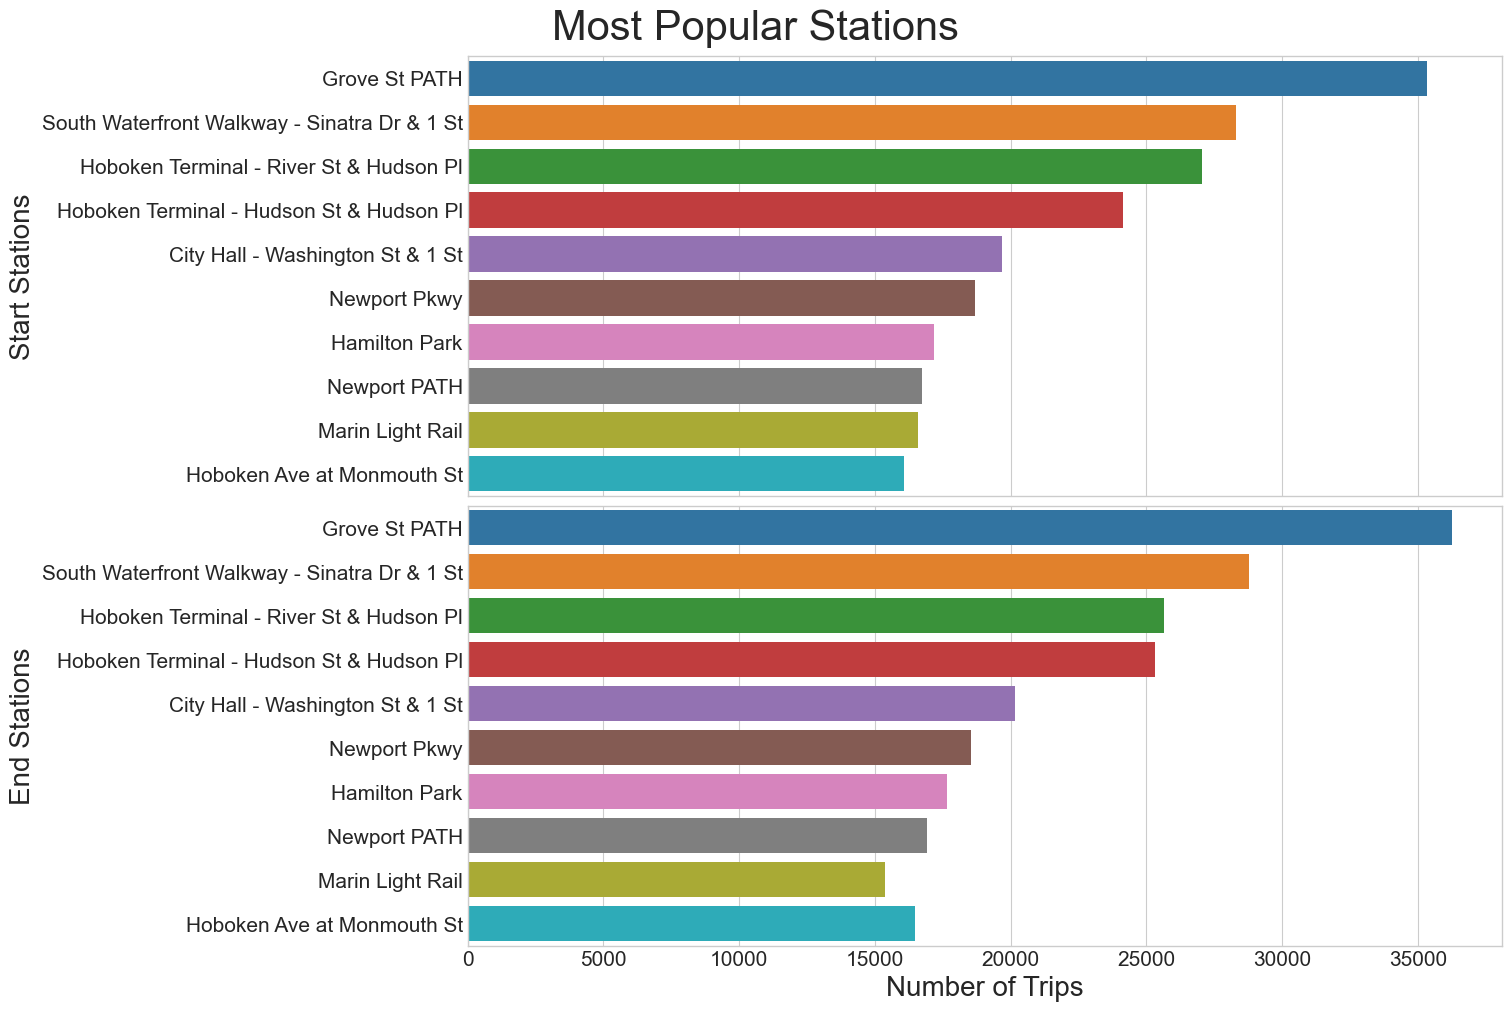

In [19]:
### Station Usage

fig, axs = plt.subplots(2,1, sharex=True, figsize = (15,10))

### Most popular start stations
ax1 = sns.countplot(data=df, y='start_station_name', order=df.value_counts(df['start_station_name']).iloc[:10].index, ax=axs[0])
ax1.set_ylabel("Start Stations", fontsize=20)
ax1.yaxis.set_tick_params(labelsize = 15)
ax1.set(xlabel=None)

### Most popular end stations
ax2 = sns.countplot(data=df, y='end_station_name', order=df.value_counts(df['start_station_name']).iloc[:10].index, ax=axs[1])
ax2.set_ylabel("End Stations", fontsize=20)
ax2.yaxis.set_tick_params(labelsize = 15)
ax2.set_xlabel("Number of Trips", fontsize=20)
ax2.xaxis.set_tick_params(labelsize = 15)

fig.suptitle("Most Popular Stations", fontsize=30)
plt.show()

In [20]:
### Start Station Locations
start_jersey_map = folium.Map(location=[df['start_lat'].mean(), df['start_lng'].mean()], zoom_start=14)
grouped_data = df.groupby('start_station_name')['ride_id'].count()

for station_id, num_trips in grouped_data.iteritems():
  # Add a marker for each Citibike station to the map, where the size of the marker is proportional to the number of trips starting at the station
  folium.CircleMarker(location=[df[df['start_station_name'] == station_id]['start_lat'].mean(), df[df['start_station_name'] == station_id]['start_lng'].mean()], radius=num_trips/1000, fill=True, color='#3186CC').add_to(start_jersey_map)

start_jersey_map

C:\Users\carlos\AppData\Local\Temp\ipykernel_14388\1304520711.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for station_id, num_trips in grouped_data.iteritems():


In [21]:
### End Station Locations
end_jersey_map = folium.Map(location=[df['end_lat'].mean(), df['end_lng'].mean()], zoom_start=14)
end_grouped_data = df.groupby('end_station_name')['ride_id'].count()

for station_id, num_trips in end_grouped_data.iteritems():
  # Add a marker for each Citibike station to the map, where the size of the marker is proportional to the number of trips starting at the station
  folium.CircleMarker(location=[df[df['end_station_name'] == station_id]['end_lat'].mean(), df[df['end_station_name'] == station_id]['end_lng'].mean()], radius=num_trips/1000, fill=True, color='#3186CC').add_to(end_jersey_map)

end_jersey_map

C:\Users\carlos\AppData\Local\Temp\ipykernel_14388\3970101352.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for station_id, num_trips in end_grouped_data.iteritems():


### When Do People Use Citi Bike?

In [22]:
### Create data frame groups rides by the season in which they occurred
df_by_season = df['season'].value_counts().rename_axis('season').reset_index(name='number_of_rides').set_index('season')
df_by_season = df_by_season.reindex(['spring', 'summer', 'fall', 'winter']).reset_index()
df_by_season.head()

,season,number_of_rides
0,spring,157439
1,summer,277313
2,fall,220813
3,winter,83148


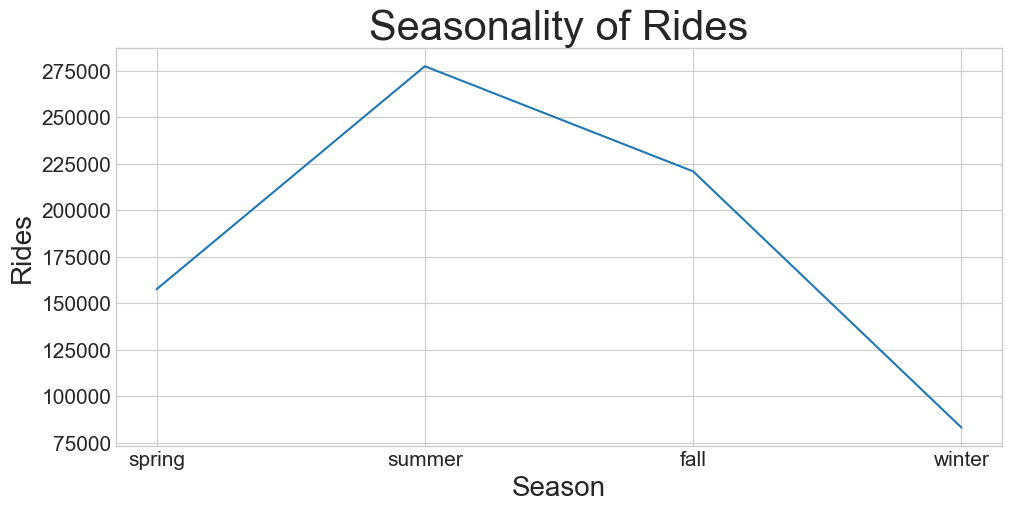

In [23]:
### Rides by season
fig, axs = plt.subplots(figsize = (10,5))

sns.lineplot(data=df_by_season, x='season', y='number_of_rides', ax=axs)
axs.set_title("Seasonality of Rides", fontsize=30)
axs.set_xlabel('Season', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Rides', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

In [24]:
### Distribution of usage by day over year

### Create list to store rows
data2 = []

### Iterate through grouped data frames for each day of the week
for day, grp in df.groupby('day_of_week'):
    ### Iterate through rows of the data frame for each day of the week
    for week, wgrp in grp.groupby("week_num"):
        ### Add the day of the week, week number in the year, and number of rows (count) to the list
        data2.append([day, week, wgrp.shape[0]])
### Create a dataframe from the list of lits
df_data2 = pd.DataFrame(data2, columns=['day', 'week', 'ride_count'])

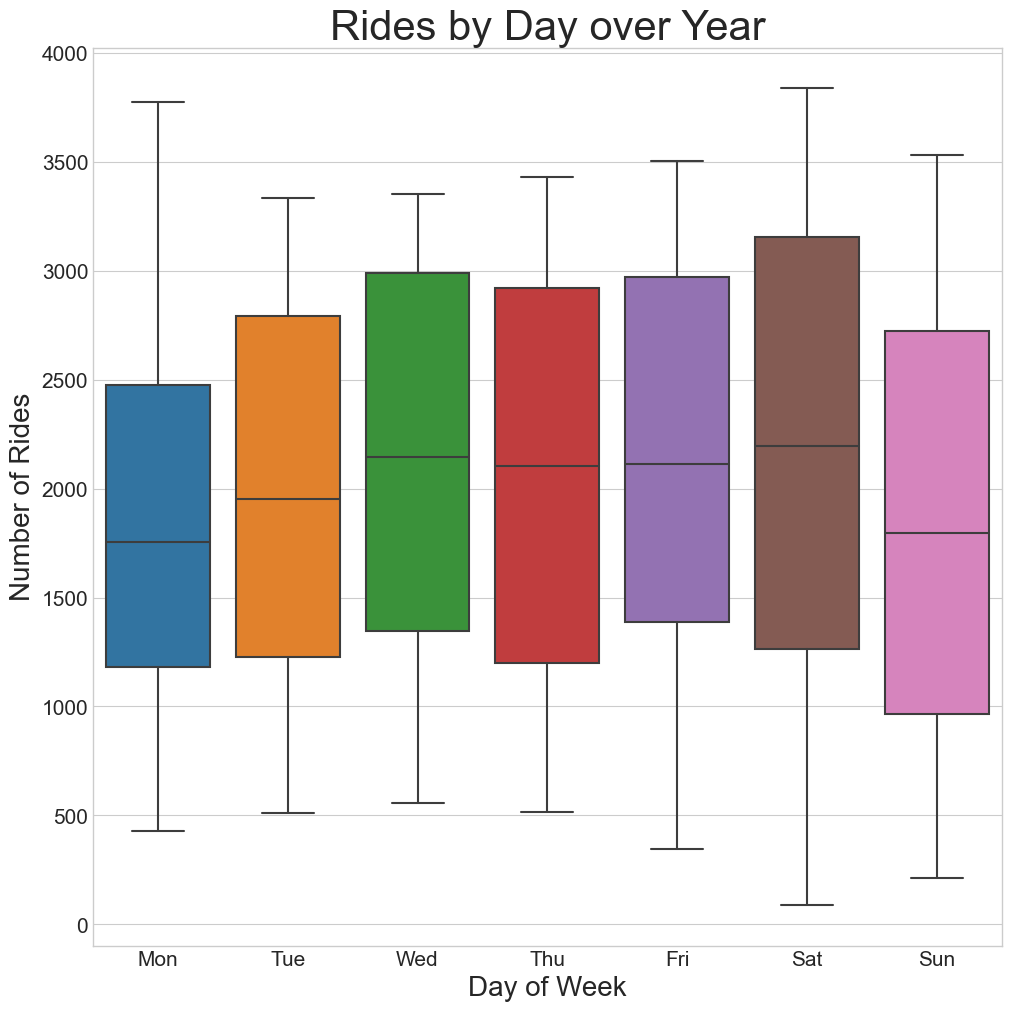

In [25]:
### Ride count by day of week over year
fig, axs = plt.subplots(figsize = (10,10))

sns.boxplot(data=df_data2, y='ride_count', x='day', ax=axs, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axs.set_title("Rides by Day over Year", fontsize=30)
axs.set_xlabel('Day of Week', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Number of Rides', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

In [26]:
### Group trips by day of week and hour that they started

df_rides_by_hour_day = pd.pivot_table(df[['day_of_week', 'start_hour', 'start_station_name']], index=['day_of_week', 'start_hour'], aggfunc='count')
df_rides_by_hour_day = df_rides_by_hour_day.unstack(level=0).reindex(labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], axis=1, level=1)

morning_hours = ["12 AM"]
afternoon_hours = ["12 PM"]

for hour in range(1, 12):
    morning_hours.append(str(hour) + " AM")
    afternoon_hours.append(str(hour) + " PM")    


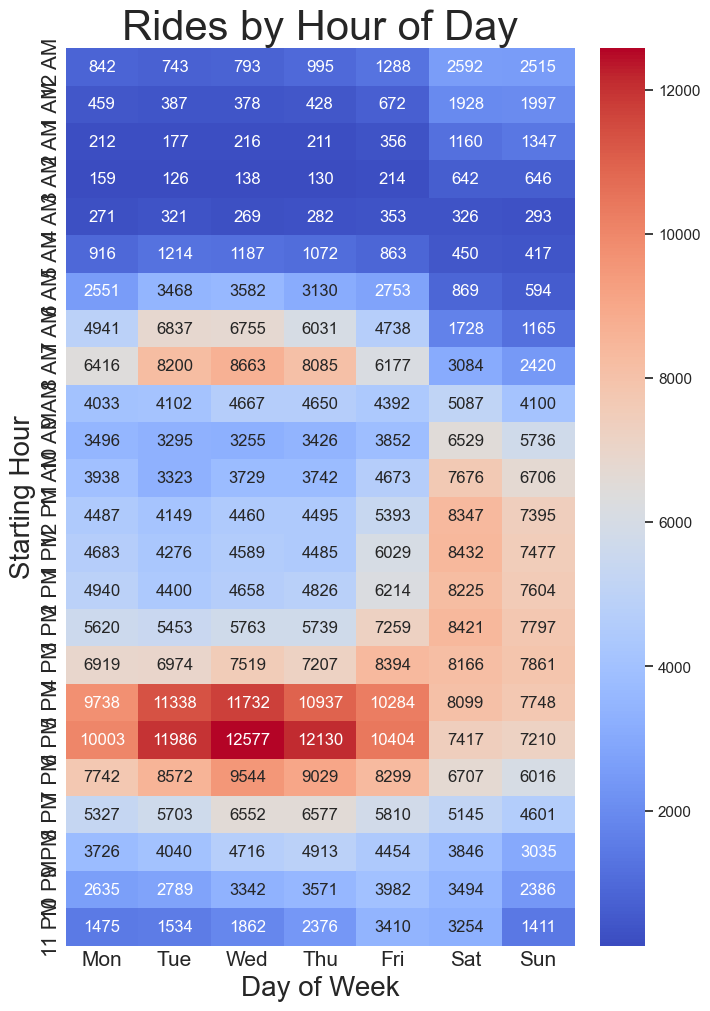

In [27]:
### Usage by Hour over Week
fig, axs = plt.subplots(figsize = (7,10))

sns.set_context("notebook")
sns.heatmap(df_rides_by_hour_day, cmap = 'coolwarm', annot=True, fmt="d", ax=axs, xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], yticklabels=morning_hours + afternoon_hours)
axs.set_title("Rides by Hour of Day", fontsize=30)
axs.set_xlabel('Day of Week', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Starting Hour', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

### How Do People Use Citi Bike?

In [28]:
### Generate descriptive statistics for ride durations
df['ride_duration_mins'].describe().round(0)

count    738713.0
mean          9.0
std           7.0
min           1.0
25%           4.0
50%           7.0
75%          12.0
max          24.0
Name: ride_duration_mins, dtype: float64

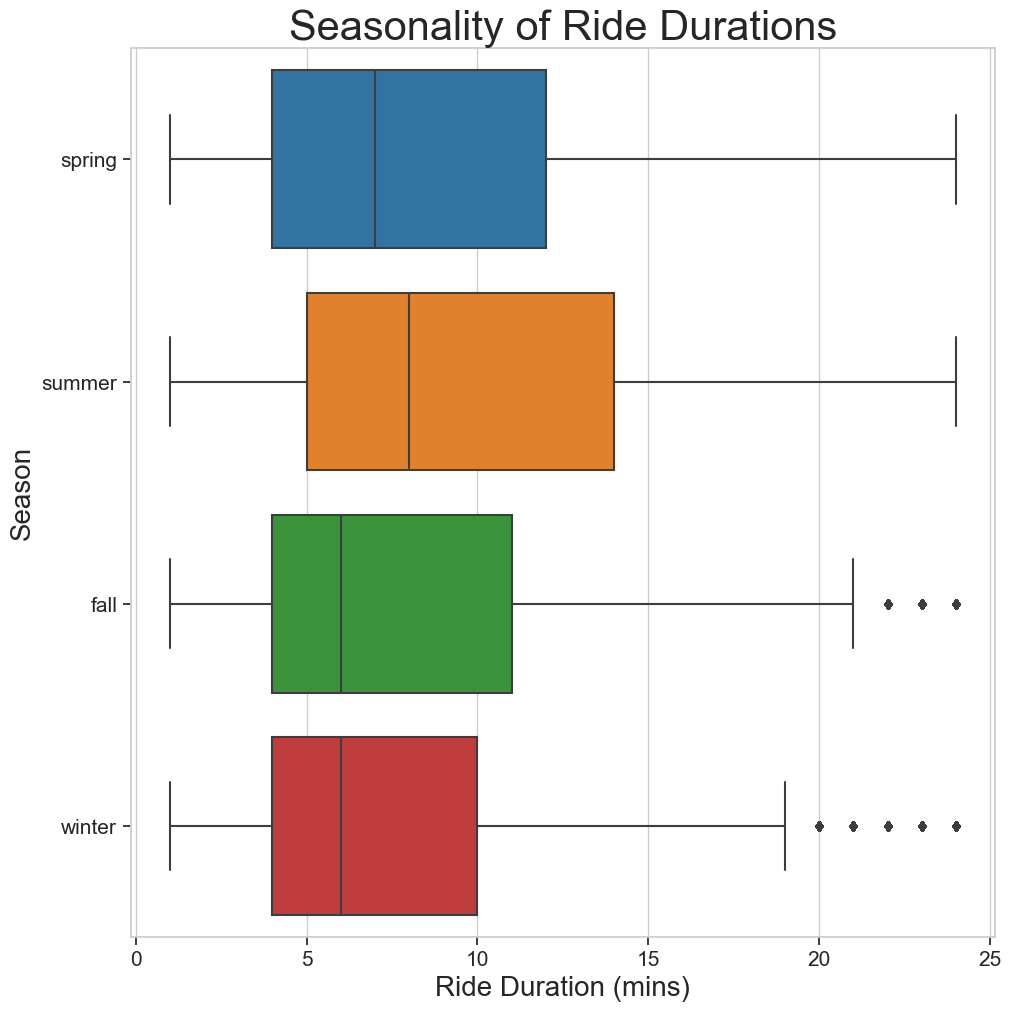

In [29]:
### Ride duration by season
fig, axs = plt.subplots(figsize = (10,10))

sns.boxplot(data=df, y='season', x='ride_duration_mins', ax=axs, order=['spring', 'summer', 'fall', 'winter'])
axs.set_title("Seasonality of Ride Durations", fontsize=30)
axs.set_xlabel('Ride Duration (mins)', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Season', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

In [30]:
### Group rides by whether they started on a weekday or weekend
df_by_weekday_weekend = df['weekday_weekend'].value_counts().rename_axis('weekday_weekend').reset_index(name='counts')

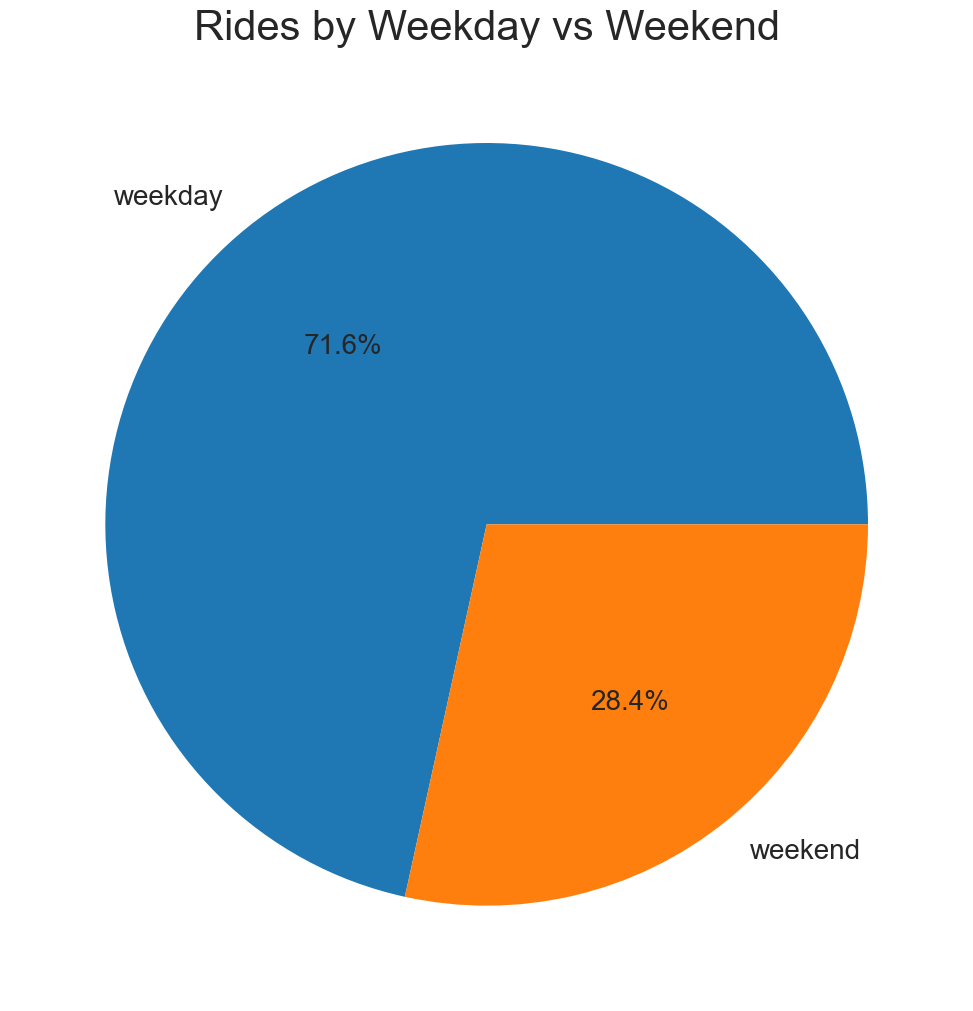

In [31]:
### Usage by weekday vs weekend
fig, axs = plt.subplots(figsize = (10,10))

axs.pie(df_by_weekday_weekend['counts'], labels=df_by_weekday_weekend['weekday_weekend'], autopct='%1.1f%%', textprops={'fontsize': 20})
axs.set_title("Rides by Weekday vs Weekend", fontsize=30)

plt.show()

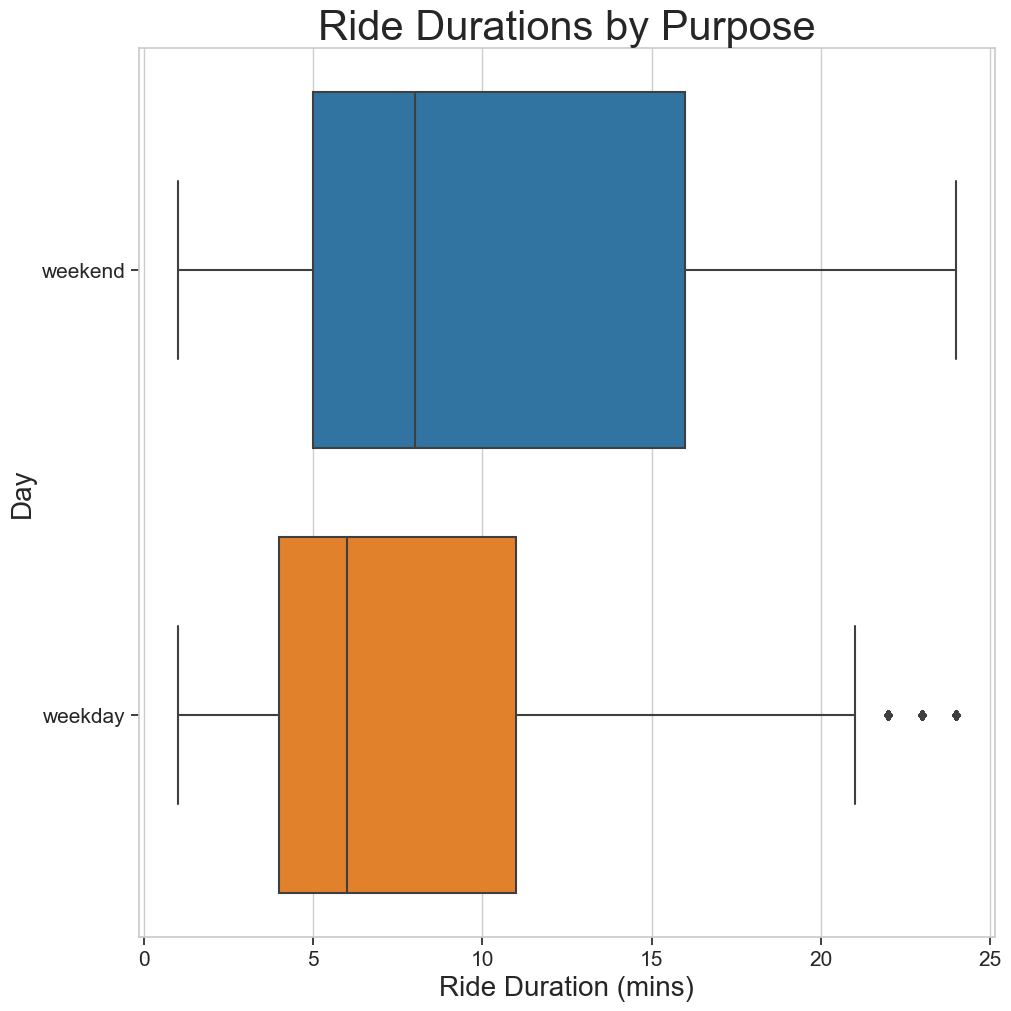

In [32]:
### Ride duration by season
fig, axs = plt.subplots(figsize = (10,10))

sns.boxplot(data=df, y='weekday_weekend', x='ride_duration_mins', ax=axs)
axs.set_title("Ride Durations by Purpose", fontsize=30)
axs.set_xlabel('Ride Duration (mins)', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Day', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

### Who Uses Citi Bike?

In [33]:
### Group users by whether they are a member or non member
df_by_season = df['member_casual'].value_counts().rename_axis('membership_type').reset_index(name='counts')

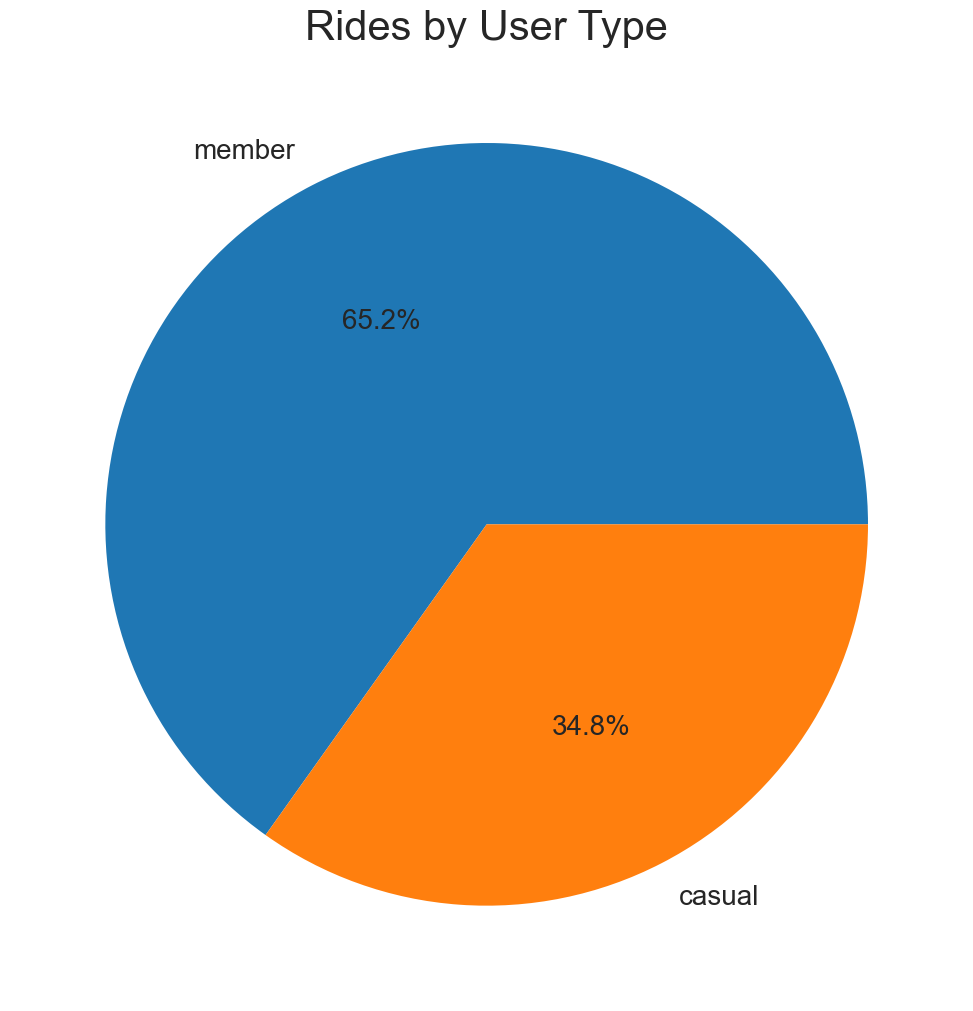

In [34]:
### Usage by user type (member vs. non member)
fig, axs = plt.subplots(figsize = (10,10))

axs.pie(df_by_season['counts'], labels=df_by_season['membership_type'], autopct='%1.1f%%', textprops={'fontsize': 20})
axs.set_title("Rides by User Type", fontsize=30)

plt.show()

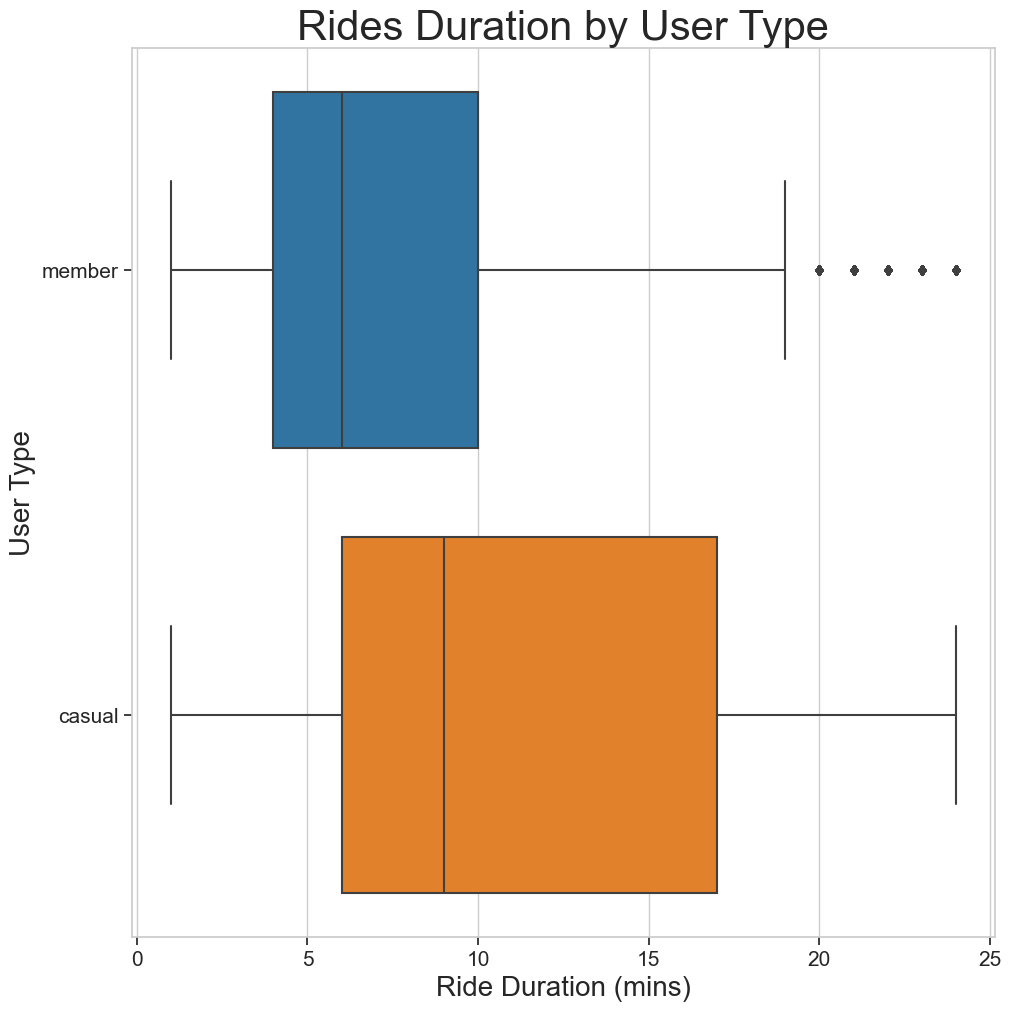

In [35]:
### Ride duration by user type

fig, axs = plt.subplots(figsize = (10,10))

sns.boxplot(data=df, y='member_casual', x='ride_duration_mins', order=['member', 'casual'], ax=axs)
axs.set_title("Rides Duration by User Type", fontsize=30)
axs.set_xlabel('Ride Duration (mins)', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('User Type', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()